In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('Conflict Scenarios Research.csv')
data.head()

,"Describe a past experience you've had that involved conflict with a family member, friend, or significant other. Be as detailed as you like.","Contrary to the previous question, describe a past experience you've had that did not involve conflict with a family member, friend or significant other. Be as detailed as you like."
0,No conflicts in recent memory - I am pretty ea...,Sold an old sports car to someone from out of ...
1,"Due to the differences in values, my parents a...","When I spent my school life, I met the 3D indu..."
2,When I was in Mumbai for a short trip I fought...,I agreed with my friends over the fact that ou...
3,A few days ago I had a conflict. I was finishi...,I do not know what to choose. But before that ...
4,As a scholar and practitioner of holistic self...,I have accepted that my 89-year-old mother has...


In [3]:
# Join text responses to create a single string for each column

conflict = ' '.join(data["Describe a past experience you've had that involved conflict with a family member, friend, or significant other. Be as detailed as you like."])
non_conflict = ' '.join(data["Contrary to the previous question, describe a past experience you've had that did not involve conflict with a family member, friend or significant other. Be as detailed as you like."])


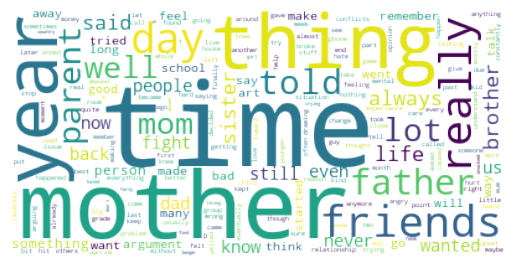

In [4]:
# Add new words to the exclusion list
conflict_stopwords = set(STOPWORDS)
conflict_stopwords.update(["one", "conflict", "much", "got", "friend", "family"])


# Generate a word cloud image
wordcloud = WordCloud(mode='RGBA',
                      background_color='rgba(255, 255, 255, 0)', 
                      stopwords=conflict_stopwords, 
                      prefer_horizontal=0.9,
                      collocations=True,
                      collocation_threshold=50).generate(conflict)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fig1 = plt.gcf()
fig1.savefig('Conflict_WordCloud.png', dpi=300, transparent=True)

plt.show()

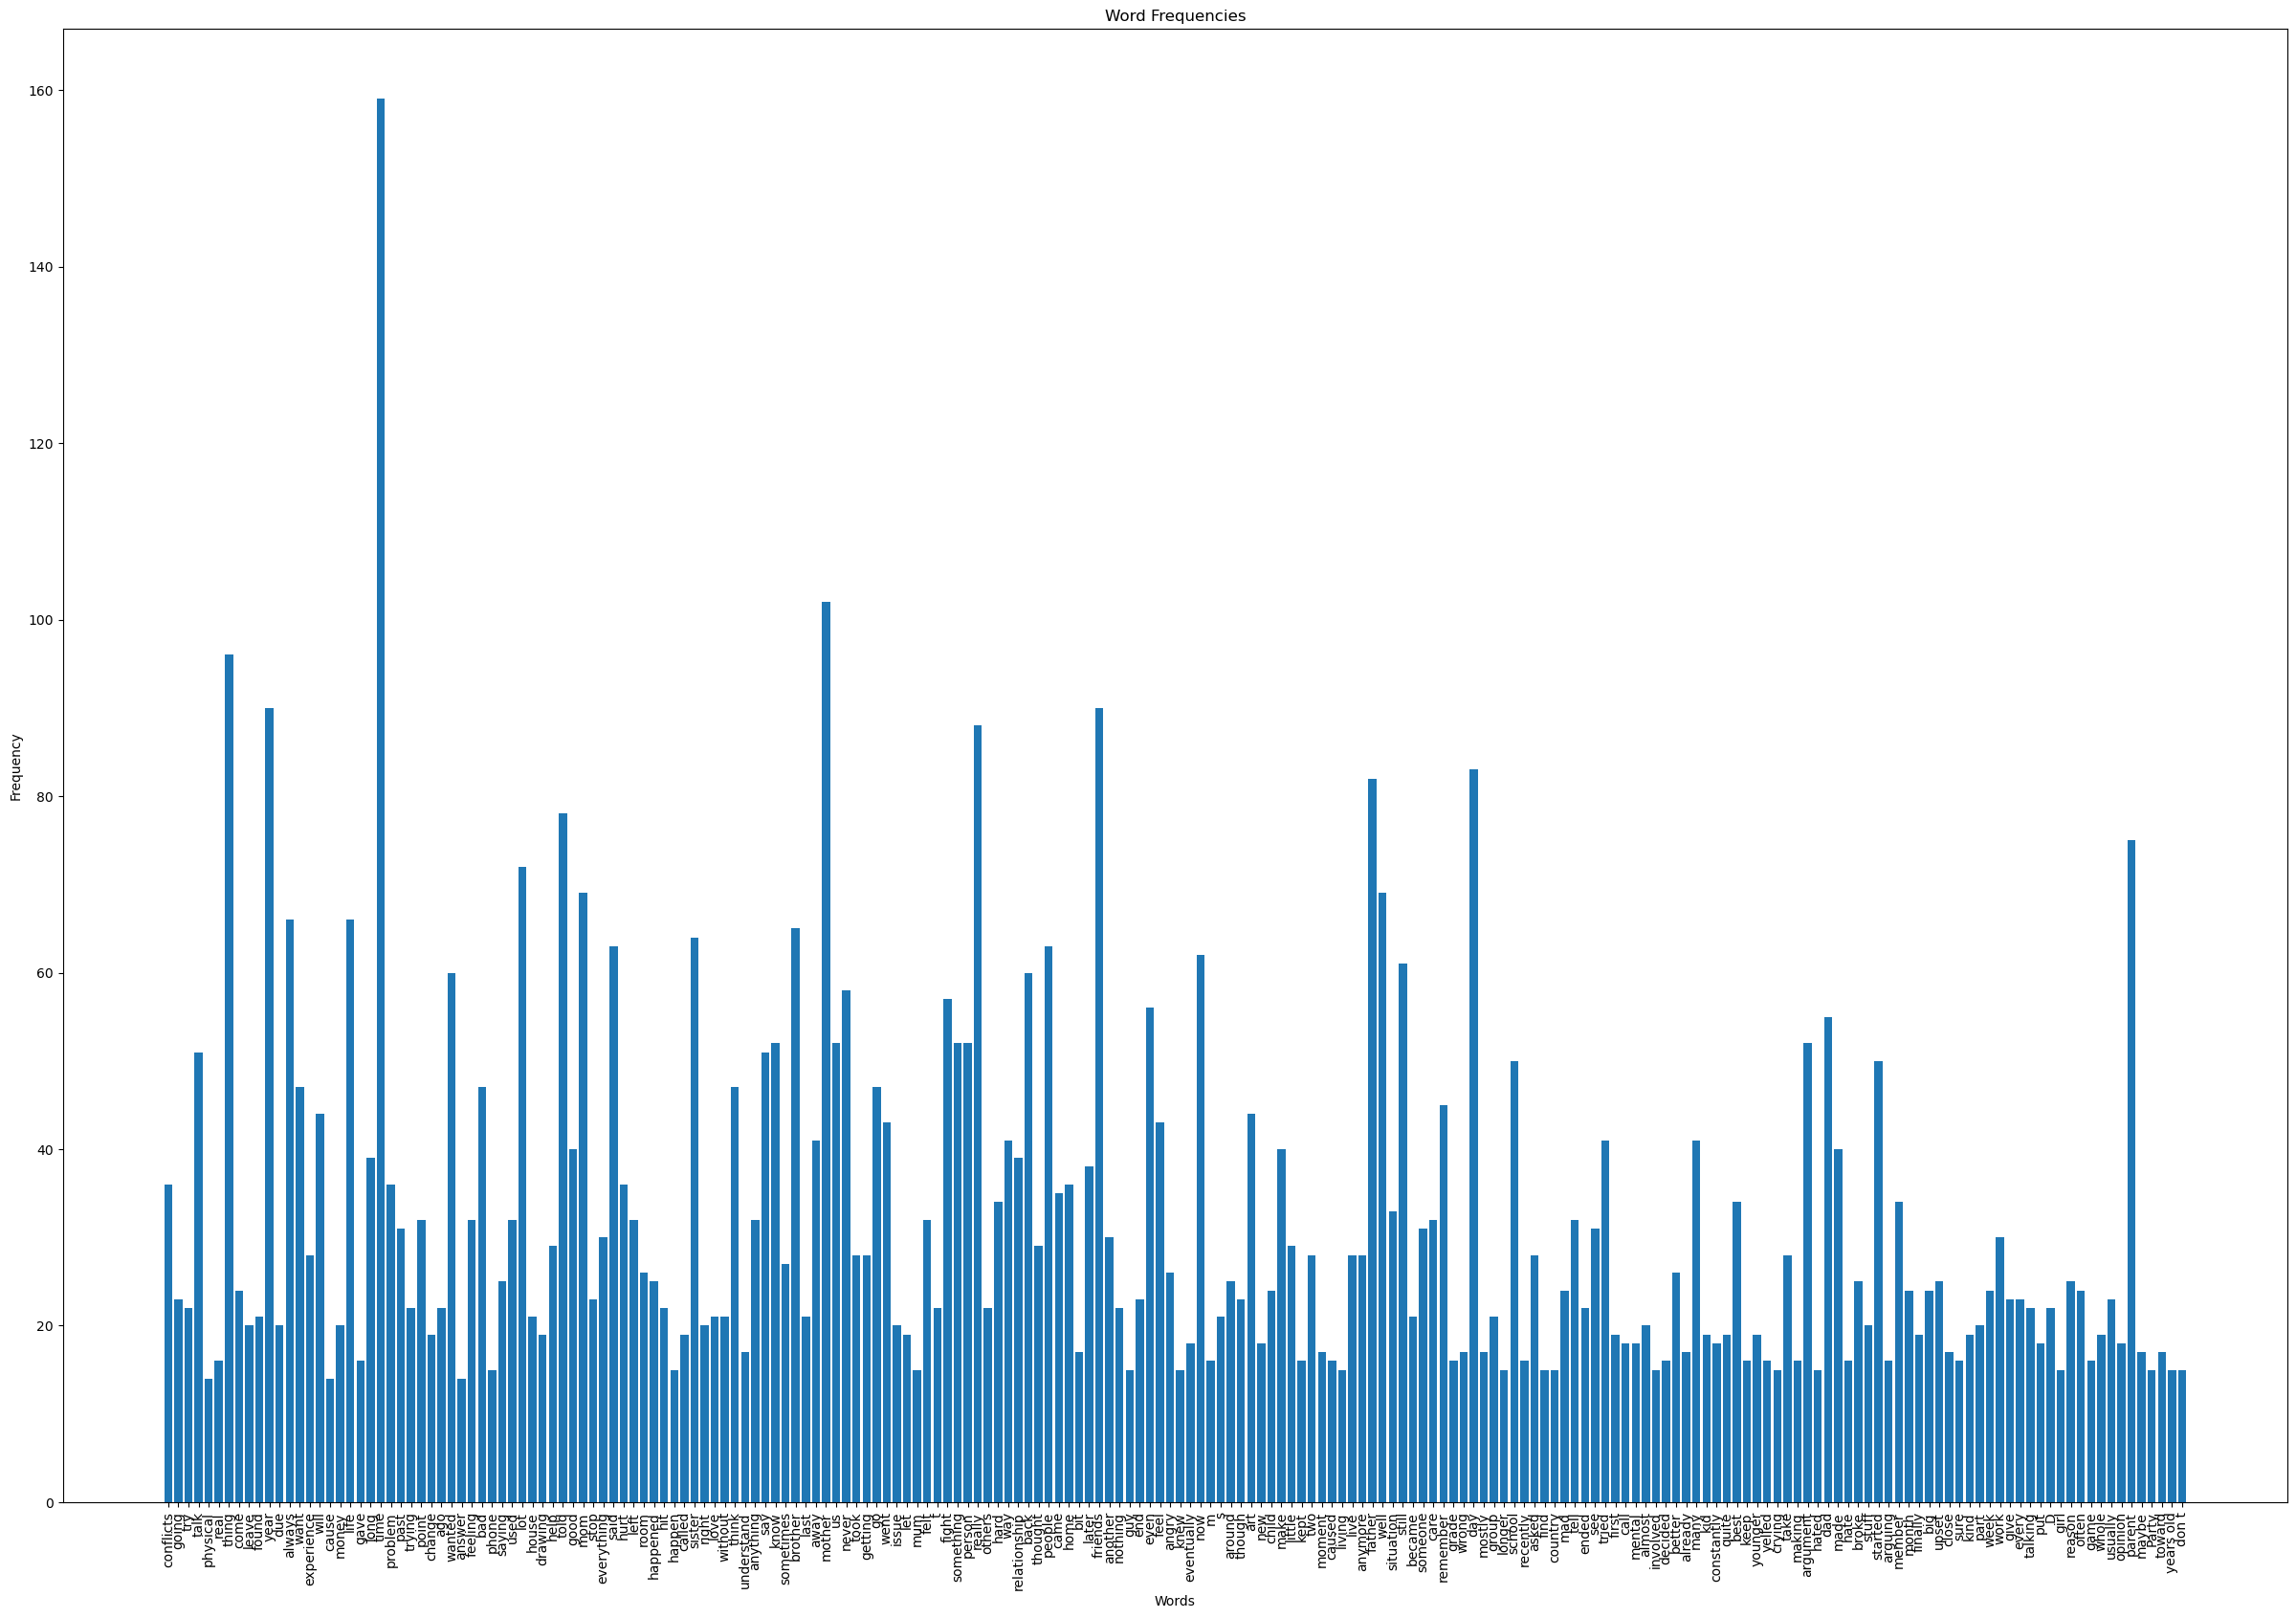

In [5]:
# Generate word frequency dictionary for words displayed in wordcloud
word_freq = {word: freq for word, freq in wordcloud.process_text(conflict).items() if word in wordcloud.words_}

# Plot word frequency bar chart
fig_size = plt.figure()
fig_size.set_figwidth(30)
fig_size.set_figheight(20)
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

fig2 = plt.gcf()
fig2.savefig('Conflict_WordFrequencies.png', dpi=300)

plt.show()

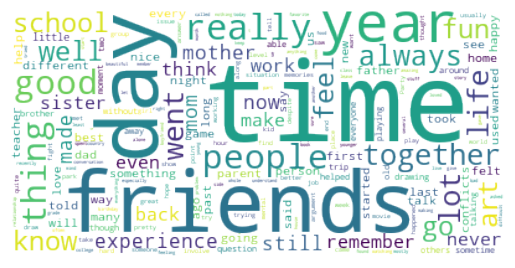

In [6]:
# Add new words to the exclusion list
non_conflict_stopwords = set(STOPWORDS)
non_conflict_stopwords.update(["one", "conflict", "much", "got", "friend", "family"])

# Generate a word cloud image
wordcloud = WordCloud(mode='RGBA',
                      background_color='rgba(255, 255, 255, 0)', 
                      stopwords=non_conflict_stopwords, 
                      prefer_horizontal=0.7,
                      collocations=True,
                      collocation_threshold=50).generate(non_conflict)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fig3 = plt.gcf()
fig3.savefig('Non_Conflict_WordCloud.png', dpi=300, transparent=True)

plt.show()

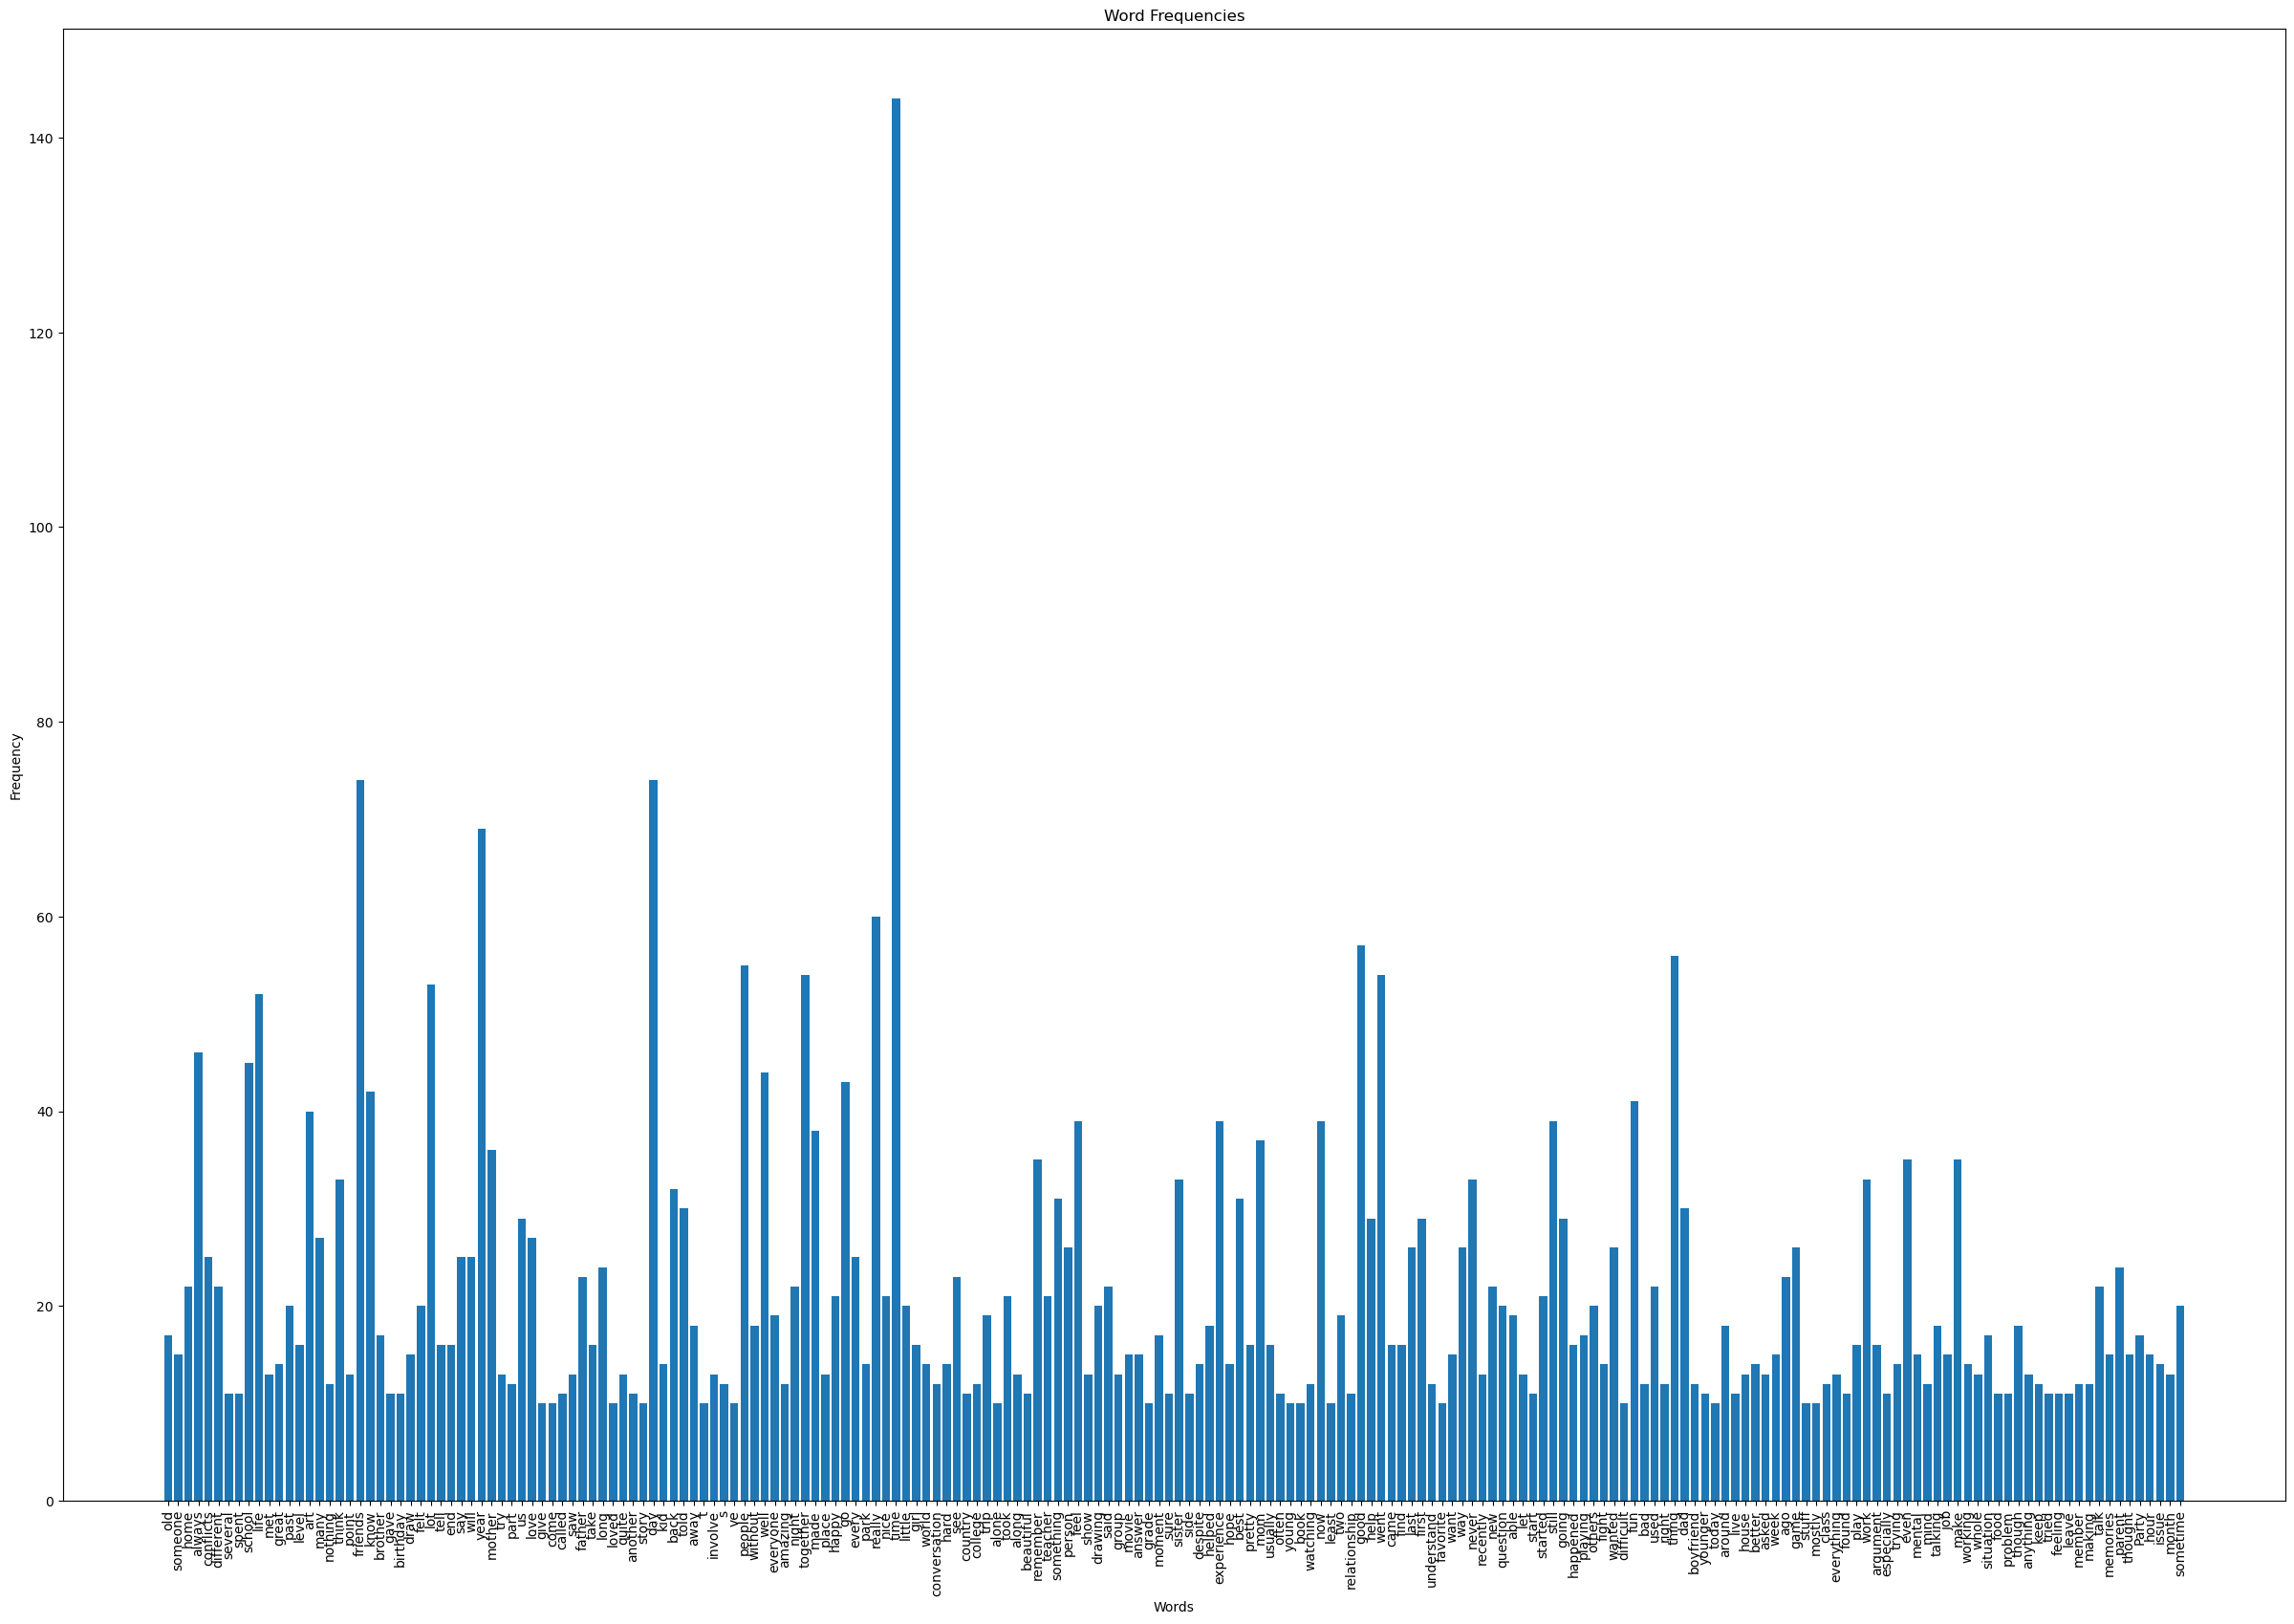

In [7]:
# Generate word frequency dictionary for words displayed in wordcloud
word_freq = {word: freq for word, freq in wordcloud.process_text(non_conflict).items() if word in wordcloud.words_}

# Plot word frequency bar chart
fig_size = plt.figure()
fig_size.set_figwidth(30)
fig_size.set_figheight(20)
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

fig4 = plt.gcf()
fig4.savefig('Non_Conflict_WordFrequencies.png', dpi=300)

plt.show()